In [1]:
import numpy as np
import pylab as plt
from aa_uv.io import hdf5_to_uvx
from aa_uv.postx import ApertureArray
from aa_uv.postx.sky_model import RadioSource

test_data =  {
    'aavs2': ('../tests/test-data/aavs2/correlation_burst_100_20211113_14447_0.hdf5',
              '../tests/test-data/aavs2/correlation_burst_204_20211113_14653_0.hdf5' ),
    'aavs3': ('../tests/test-data/aavs3/correlation_burst_100_20240107_19437_0.hdf5',
              '../tests/test-data/aavs3/correlation_burst_204_20240107_19437_0.hdf5' ),
    'eda2':  ('../tests/test-data/eda2/correlation_burst_100_20211211_14167_0.hdf5',
              '../tests/test-data/eda2/correlation_burst_204_20211211_14373_0.hdf5' ),
}

In [2]:
uvx = hdf5_to_uvx(test_data['aavs3'][0], telescope_name='aavs3')
aa = ApertureArray(uvx)

2024-06-28 10:04:41.454 | INFO     | aa_uv.io.to_uvx:load_observation_metadata:34 - Using internal config aavs3
/Users/daniel.price/Data/aavs_uv/src/aa_uv/datamodel/uvx.py:182: FutureWarning: Setting the location attribute post initialization will be disallowed in a future version of Astropy. Instead you should set the location when creating the Time object. In the future, this will raise an AttributeError.
  t.location = eloc
2024-06-28 10:04:41.892 | INFO     | aa_uv.datamodel.uvx:create_visibility_array:209 - Conjugating data
2024-06-28 10:04:41.895 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:178 - Could not find expected keys in observation_info
2024-06-28 10:04:41.895 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:180 - <KeysViewHDF5 []>


### Module overview

In [3]:
aa.plotting

<Aperture Array module: plotting>
 A class for plotting utilties

    Provides the following functions:
    plot_corr_matrix()
    plot_corr_matrix_4pol()
    plot_antennas()
    plot_uv_dist_amp()

    

In [4]:
aa.coords

<Aperture Array module: coords>
 Coordinate utils

    Provides the following:
        get_sun() - Get the position of the sun as a SkyCoord
        get_zenith() - Get the zenith as a SkyCoord
        get_alt_az() - Get the alt/az of a given SkyCoord
        generate_phase_vector() - Generate a phase vector toward a given SkyCoord

    

In [5]:
aa.calibration

<Aperture Array module: calibration>
 ApertureArray Calibration module

    Provides the following sub-modules:
    holography - self-holography techniques
    stefcal - calibration based on stefcal approach

    

In [6]:
aa.calibration.holography

<Aperture Array module: holography>
 A class version of the above jishnu-cal holography routines.

    Provides the following functions:
    set_cal_src() - set the reference source
    run_phasecal() - run jishnu_phasecal
    run_selfholo() - run jishnu_selfholo
    plot_aperture() - plot aperture illumination (run_selfholo must be run first)
    plot_aperture_xy() - plot aperture illumination, 2x2 grid of X and Y mag + phs
    plot_phasecal_iterations() - shows iteration STD plot
    plot_farfield_beam_pattern() - plot cuts through the farfield electric-field pattern (power)

    

In [7]:
aa.calibration.stefcal

<module 'aa_uv.postx.calibration.stefcal' from '/Users/daniel.price/Data/aavs_uv/src/aa_uv/postx/calibration/stefcal.py'>

In [8]:
aa.simulation

<Aperture Array module: simulation>
 Simulate visibilities using matvix

    Provides the following:
        sim_vis_pointsrc(): Simulate visibilities from point source dictionary
        sim_vis_gsm(): Simulate visibilites using pygdsm sky model
        orthview_gsm(): View observed diffuse sky model (Orthographic)
        mollview_gsm(): View observed diffuse sky model (Mollview)
    

In [9]:
aa.imaging

<Aperture Array module: imaging>
 ApertureArray Imaging module

    Provides the following functions:
    make_image()   - Make a 2D all-sky image (orthographic)
    make_healpix() - Make a healpix all-sky image

    

In [10]:
aa.viewer

<Aperture Array module: All Sky Viewer>
 An all-sky imager based on matplotlib imshow with WCS support

    Provides the following:
        orthview() - Plot all-sky image in Orthographic projection
        mollview() - Plot all-sky image using healpy Mollview
        load_labels() - Load dictionary of sky coordinates as labels
        get_pixel() - get pixel ID for a given skycoord
        write_fits() - write to FITS file
        orthview_gsm() - orthview plot observed Global diffuse sky model using pygdsm
        mollview_gsm() - mollview plot observed Global diffuse sky model using pygdsm
    

## aa.plotting

In [11]:
aa.plotting

<Aperture Array module: plotting>
 A class for plotting utilties

    Provides the following functions:
    plot_corr_matrix()
    plot_corr_matrix_4pol()
    plot_antennas()
    plot_uv_dist_amp()

    

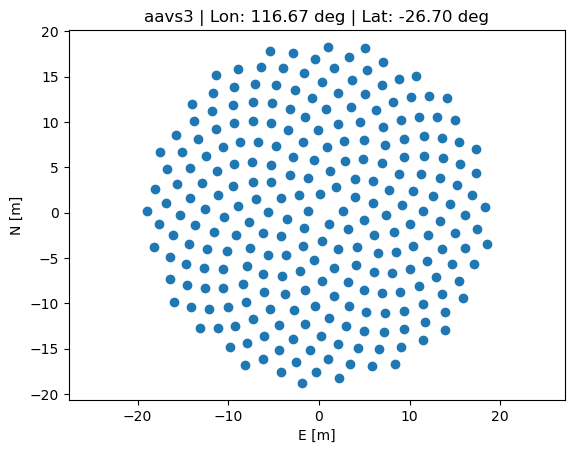

In [12]:
aa.plotting.plot_antennas()

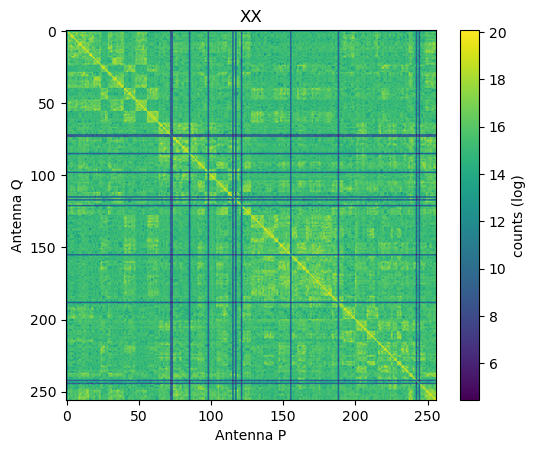

In [13]:
aa.plotting.plot_corr_matrix()

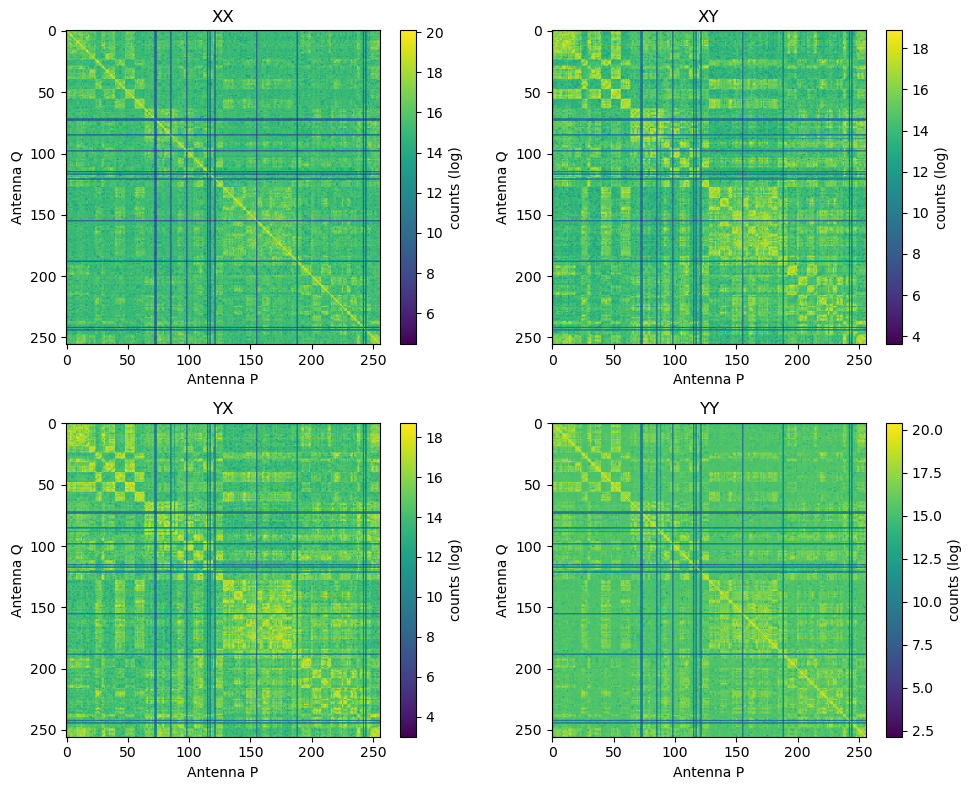

In [14]:
aa.plotting.plot_corr_matrix_4pol()

(12.0, 20.0)

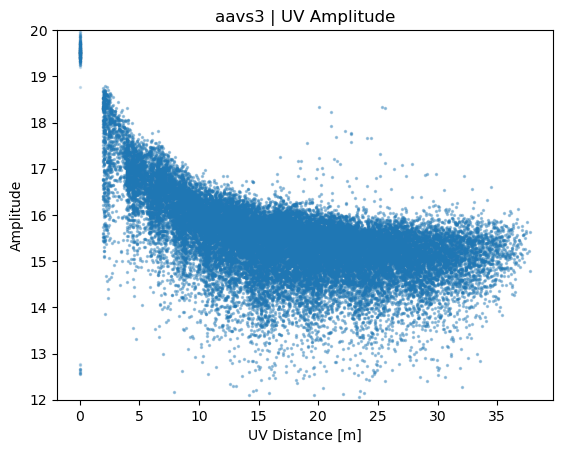

In [35]:
aa.plotting.plot_uvdist_amp(sfunc=np.log)
plt.ylim(12, 20)

## aa.coords

In [36]:
aa.coords

<Aperture Array module: coords>
 Coordinate utils

    Provides the following:
        get_sun() - Get the position of the sun as a SkyCoord
        get_zenith() - Get the zenith as a SkyCoord
        get_alt_az() - Get the alt/az of a given SkyCoord
        generate_phase_vector() - Generate a phase vector toward a given SkyCoord

    

In [17]:
aa.coords.get_sun()

<SkyCoord (GCRS: obstime=1704605056.2133846, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (287.40918398, -22.47163409, 0.98335141)>

In [18]:
aa.coords.get_zenith()

<SkyCoord (ICRS): (ra, dec) in deg
    (303.66824887, -26.77500093)>

In [19]:
from astropy.coordinates import SkyCoord
sc = SkyCoord(150, 45, unit=('deg', 'deg'))

aa.coords.get_alt_az(sc)

<SkyCoord (AltAz: obstime=1704605056.2133846, location=(-2559377.99363595, 5095349.74793982, -2849124.06772244) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (317.64891732, -62.16540583)>

In [20]:
# Generates per-antenna phase weights
phs_vec = aa.coords.generate_phase_vector(aa.coords.get_sun())

## aa.calibration

## aa.calibration.holography

In [21]:
aa.calibration.holography

<Aperture Array module: holography>
 A class version of the above jishnu-cal holography routines.

    Provides the following functions:
    set_cal_src() - set the reference source
    run_phasecal() - run jishnu_phasecal
    run_selfholo() - run jishnu_selfholo
    plot_aperture() - plot aperture illumination (run_selfholo must be run first)
    plot_aperture_xy() - plot aperture illumination, 2x2 grid of X and Y mag + phs
    plot_phasecal_iterations() - shows iteration STD plot
    plot_farfield_beam_pattern() - plot cuts through the farfield electric-field pattern (power)

    

In [22]:
aa.calibration.holography.set_cal_src(aa.coords.get_sun())

holo_dict = aa.calibration.holography.run_selfholo(vis='data')
print(holo_dict.keys())

2024-06-28 10:04:43.185 | INFO     | aa_uv.postx.calibration.holography:jishnu_selfholo:212 - Generating vis matrix: data


dict_keys(['beam_corr', 'aperture_img', 'meas_corr', 'lmn_grid', 'vis_matrix', 'aperture_size', 'n_pix', 'oversample_factor'])


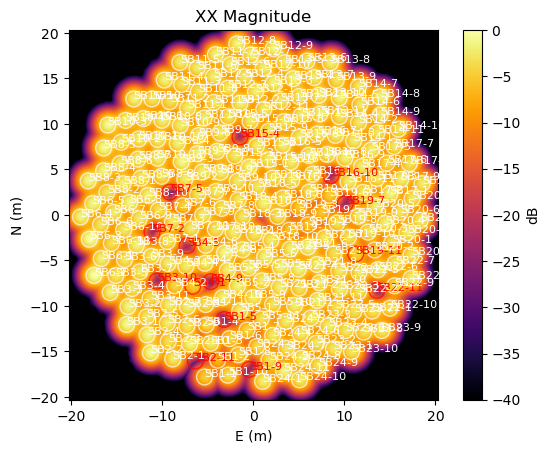

In [23]:
aa.calibration.holography.plot_aperture(plot_type='mag', annotate=True)

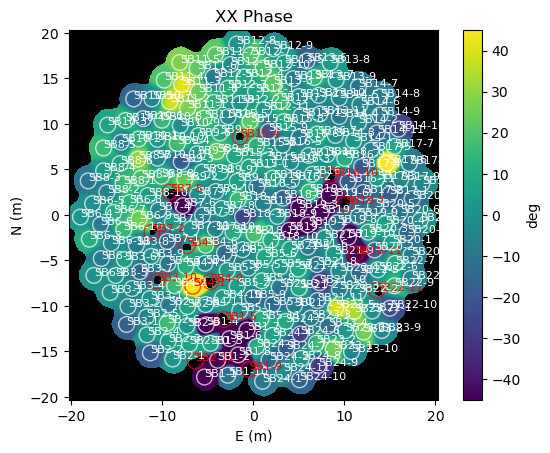

In [24]:
aa.calibration.holography.plot_aperture(plot_type='phs', phs_range=(-45, 45), annotate=True)

In [25]:
cal = aa.calibration.holography.run_phasecal()

#TODO: Fix report_flagged_antennas()
#aa.calibration.holography.report_flagged_antennas()

2024-06-28 10:04:46.056 | INFO     | aa_uv.postx.calibration.holography:jishnu_phasecal:299 - Iter 5: Target phase std reached, breaking


2024-06-28 10:04:46.118 | INFO     | aa_uv.postx.calibration.holography:jishnu_selfholo:212 - Generating vis matrix: cal


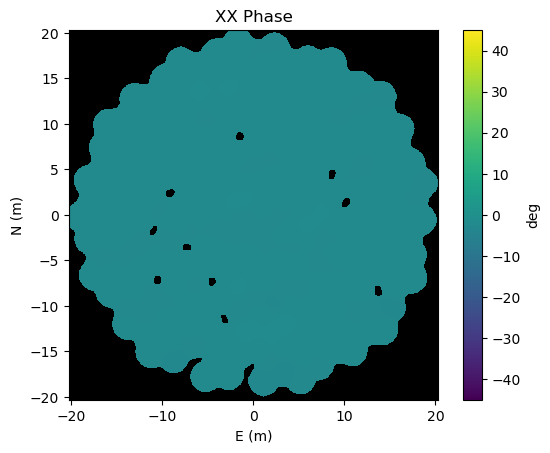

In [26]:
aa.set_cal(cal)
holo_dict = aa.calibration.holography.run_selfholo(vis='cal')
aa.calibration.holography.plot_aperture(plot_type='phs', phs_range=(-45, 45))

## aa.imaging and aa.viewer

In [27]:
aa.imaging

<Aperture Array module: imaging>
 ApertureArray Imaging module

    Provides the following functions:
    make_image()   - Make a 2D all-sky image (orthographic)
    make_healpix() - Make a healpix all-sky image

    

In [28]:
aa.viewer

<Aperture Array module: All Sky Viewer>
 An all-sky imager based on matplotlib imshow with WCS support

    Provides the following:
        orthview() - Plot all-sky image in Orthographic projection
        mollview() - Plot all-sky image using healpy Mollview
        load_labels() - Load dictionary of sky coordinates as labels
        get_pixel() - get pixel ID for a given skycoord
        write_fits() - write to FITS file
        orthview_gsm() - orthview plot observed Global diffuse sky model using pygdsm
        mollview_gsm() - mollview plot observed Global diffuse sky model using pygdsm
    

In [29]:
img = aa.imaging.make_image(vis='cal')
hpx = aa.imaging.make_healpix(vis='data')

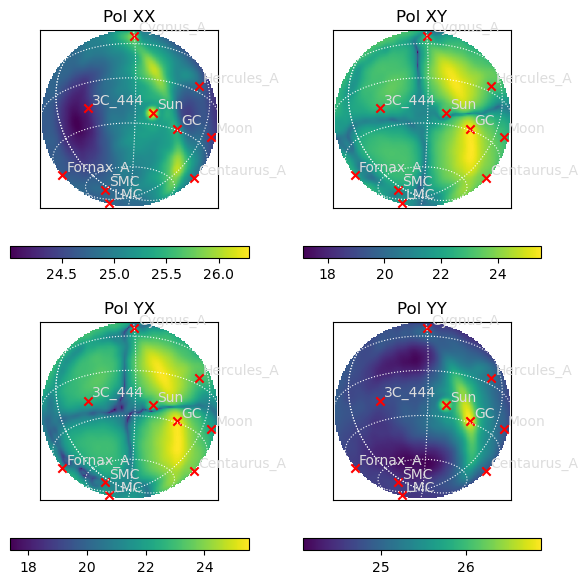

In [30]:
plt.figure(figsize=(3*2,3*2))
for ii in range(4):
    aa.viewer.orthview(img, 
                       sfunc=np.log,
                       overlay_srcs=True, colorbar=True, pol_idx=ii, 
                       subplot_id=(2,2,ii+1), 
                       title=f"Pol {aa.uvx.data.polarization[ii].values}")
plt.tight_layout()

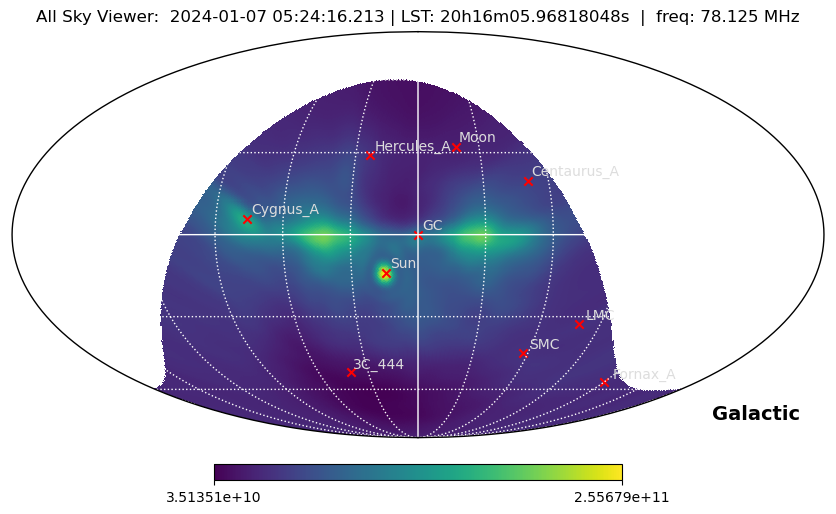

In [31]:
aa.viewer.mollview(hpx, overlay_srcs=True)

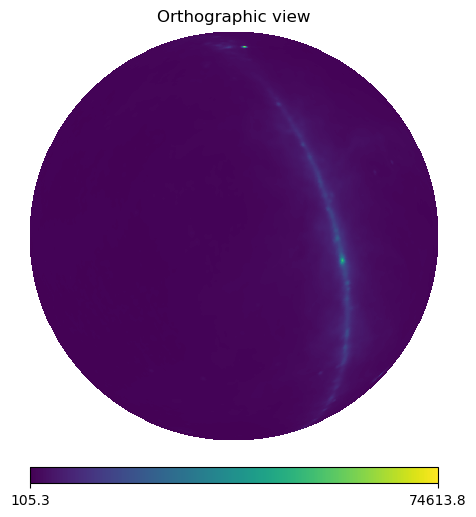

In [39]:
aa.viewer.orthview_gsm()

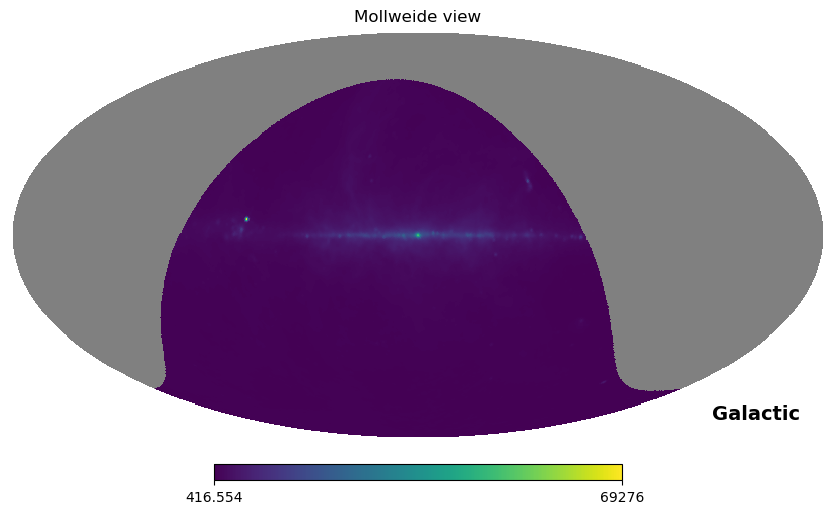

In [33]:
aa.simulation.mollview_gsm()

In [34]:
sc = aa.coords.get_sun()
print(aa.viewer.get_pixel(sc))

NSIDE = 128
print(aa.viewer.get_pixel_healpix(NSIDE, sc))

(68, 81)
17065
